<a href="https://colab.research.google.com/github/Kzis/BADS4002/blob/master/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

dataset = pd.read_csv('AirBNB_Taipei_listings_clean_missing.csv').drop('id', 1)

dataset.head()


,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,2,1.0,1,1,1523,2,0,7,365,0,0,0,238,2,13
1,2,1.0,1,1,914,1,0,30,365,0,0,11,286,6,13
2,3,1.0,1,1,1523,1,244,2,365,18,42,56,56,40,4
3,2,1.0,1,1,1279,1,244,1,365,22,52,82,82,44,4
4,4,4.0,1,4,396,1,350,1,90,26,54,84,353,47,16


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(dataset)  

print(len(X_train[0]))
X_train

15


array([[-0.62531604, -0.34117854, -0.25640569, ...,  0.39342733,
        -0.60312427,  0.22604454],
       [-0.62531604, -0.34117854, -0.25640569, ...,  0.76652263,
        -0.51287398,  0.22604454],
       [-0.28842068, -0.34117854, -0.25640569, ..., -1.0212257 ,
         0.25425351, -0.47862181],
       ...,
       [-0.28842068, -0.34117854, -0.25640569, ..., -0.82690523,
        -0.64824942, -0.63521433],
       [ 0.04847469, -0.34117854, -1.31066079, ..., -0.11180589,
        -0.64824942, -0.24373302],
       [-0.62531604, -0.34117854, -0.25640569, ...,  1.36502968,
        -0.64824942, -0.71351059]])

In [5]:
import numpy as np
cov_mat = np.cov(X_train.T) 
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 1.00011086e+00  4.25179493e-01  5.46096704e-01  6.90804075e-01
   6.14689857e-02  5.63340051e-01  2.15591577e-01 -3.75173849e-02
   2.88390161e-02  6.78172126e-02  5.77936173e-02  5.63903519e-02
   1.09898334e-01  3.42839541e-02  3.17193270e-02]
 [ 4.25179493e-01  1.00011086e+00  3.07355102e-01  5.74314982e-01
   5.20121092e-03  1.15689165e-01  5.16304208e-02 -1.96351746e-02
   5.90997012e-02  1.62891161e-01  1.36341791e-01  1.23559374e-01
   1.35560018e-01 -9.95116187e-02  1.57096128e-01]
 [ 5.46096704e-01  3.07355102e-01  1.00011086e+00  4.25297772e-01
   6.79719789e-02  4.19390647e-01  1.03075217e-01 -5.54617277e-03
   4.15960351e-02 -1.37575640e-02 -2.77019648e-02 -2.96807596e-02
   3.83217406e-02 -1.16724041e-02 -2.46929227e-03]
 [ 6.90804075e-01  5.74314982e-01  4.25297772e-01  1.00011086e+00
   1.87246139e-02  3.25660734e-01  1.20117312e-01 -2.59491965e-02
   4.23559616e-02  1.57735200e-01  1.30844481e-01  1.20964538e-01
   1.31029620e-01 -4.50231503

In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.24402149e-01 -4.71892208e-01 -9.81009067e-04  1.29020438e-02
   7.43937578e-01 -7.84004391e-02  3.31920158e-01  2.19246830e-01
   3.73187763e-02 -3.38657473e-02 -1.91354278e-02  5.59000793e-02
   2.69357282e-02 -3.67759842e-02 -2.92491320e-02]
 [ 2.35004202e-01 -2.78918042e-01  5.79451739e-04 -1.33411480e-02
   9.77314718e-02  3.27481635e-01 -6.44415561e-01  1.07129558e-02
  -5.93381770e-02  9.38882651e-02 -2.28413807e-01 -1.44908447e-02
   1.09564027e-01  5.01473097e-01  8.01196899e-02]
 [ 1.38523232e-01 -4.07944693e-01 -1.34464432e-03 -4.59316280e-03
  -9.60637540e-02 -3.62559232e-02  4.16030591e-04 -7.99690321e-01
  -7.29133646e-02  4.17814659e-02  2.73884467e-02  1.02467366e-01
   9.99453378e-02 -2.05879361e-01 -3.05998198e-01]
 [ 2.64702328e-01 -3.97233917e-01 -3.75645128e-03 -3.67928620e-02
  -5.98855578e-01  1.75333724e-01  4.95729377e-01  2.25917864e-01
   8.50192687e-02  1.95810669e-02 -1.55803656e-01  2.29337420e-02
   7.37129824e-02  1.92787779e-01  9.7982

In [7]:
cor_mat = np.corrcoef(X_train.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.24402149e-01 -4.71892208e-01 -9.81009067e-04  1.29020438e-02
   7.43937578e-01 -7.84004391e-02  3.31920158e-01  2.19246830e-01
   3.73187763e-02 -3.38657473e-02 -1.91354278e-02  5.59000793e-02
   2.69357282e-02 -3.67759842e-02 -2.92491320e-02]
 [ 2.35004202e-01 -2.78918042e-01  5.79451739e-04 -1.33411480e-02
   9.77314718e-02  3.27481635e-01 -6.44415561e-01  1.07129558e-02
  -5.93381770e-02  9.38882651e-02 -2.28413807e-01 -1.44908447e-02
   1.09564027e-01  5.01473097e-01  8.01196899e-02]
 [ 1.38523232e-01 -4.07944693e-01 -1.34464432e-03 -4.59316280e-03
  -9.60637540e-02 -3.62559232e-02  4.16030591e-04 -7.99690321e-01
  -7.29133646e-02  4.17814659e-02  2.73884467e-02  1.02467366e-01
   9.99453378e-02 -2.05879361e-01 -3.05998198e-01]
 [ 2.64702328e-01 -3.97233917e-01 -3.75645128e-03 -3.67928620e-02
  -5.98855578e-01  1.75333724e-01  4.95729377e-01  2.25917864e-01
   8.50192687e-02  1.95810669e-02 -1.55803656e-01  2.29337420e-02
   7.37129824e-02  1.92787779e-01  9.7982

In [8]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  

X_train

array([[-2.56073001e+00,  2.96063569e-01, -7.75753083e-01, ...,
         1.53057509e-01,  3.10351146e-01,  5.46671691e-02],
       [-2.34287929e+00, -1.28840006e-01, -9.77438606e-01, ...,
         9.04971510e-04,  9.99884488e-02, -1.32656596e-01],
       [-6.65158271e-01, -7.82224724e-01,  7.08658955e-01, ...,
        -2.46737611e-01,  1.48380635e-01,  1.75214801e-01],
       ...,
       [ 9.90400811e-01, -1.09233623e+00,  6.41984928e-01, ...,
         1.34057539e-01,  2.97782606e-01,  1.05502360e-01],
       [ 9.55210672e-01, -1.73015578e+00, -3.04417525e-01, ...,
        -4.03380086e-01, -1.44427632e-02, -2.89785345e-02],
       [ 1.29942247e+00, -2.05106692e+00,  9.11906049e-01, ...,
         4.85112937e-02,  1.42322214e-01, -1.84772329e-02]])

In [9]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.23199521, 0.18210222, 0.08398087, 0.07055733, 0.06914349,
       0.06602464, 0.06079036, 0.05462341, 0.0540158 , 0.03990569,
       0.03528236, 0.0276418 , 0.01561598, 0.00727093, 0.00104991])

In [10]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  

X_train

array([[-2.56073001e+00,  2.96063569e-01, -7.75753083e-01, ...,
         1.53057509e-01,  3.10351146e-01,  5.46671691e-02],
       [-2.34287929e+00, -1.28840006e-01, -9.77438606e-01, ...,
         9.04971510e-04,  9.99884488e-02, -1.32656596e-01],
       [-6.65158271e-01, -7.82224724e-01,  7.08658955e-01, ...,
        -2.46737611e-01,  1.48380635e-01,  1.75214801e-01],
       ...,
       [ 9.90400811e-01, -1.09233623e+00,  6.41984928e-01, ...,
         1.34057539e-01,  2.97782606e-01,  1.05502360e-01],
       [ 9.55210672e-01, -1.73015578e+00, -3.04417525e-01, ...,
        -4.03380086e-01, -1.44427632e-02, -2.89785345e-02],
       [ 1.29942247e+00, -2.05106692e+00,  9.11906049e-01, ...,
         4.85112937e-02,  1.42322214e-01, -1.84772329e-02]])

In [11]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.23199521, 0.18210222, 0.08398087, 0.07055733, 0.06914349,
       0.06602464, 0.06079036, 0.05462341, 0.0540158 , 0.03990569,
       0.03528236, 0.0276418 , 0.01561598, 0.00727093, 0.00104991])

In [39]:
df = pd.DataFrame()
df = df.append(pd.DataFrame(explained_variance.tolist(), columns=['Proportion of Variance Explained']))
df.index = np.arange(1,len(df)+1)
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Proportion of Variance Explained,0.231995,0.182102,0.083981,0.070557,0.069143,0.066025,0.06079,0.054623,0.054016,0.039906,0.035282,0.027642,0.015616,0.007271,0.00105


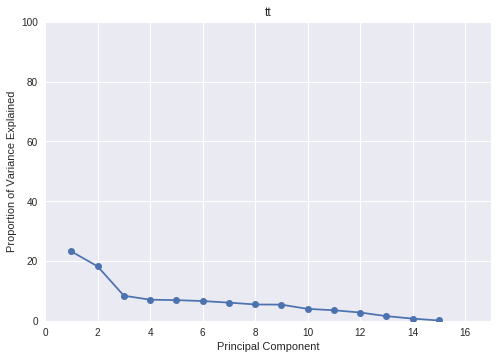

In [21]:
#plot 
import matplotlib.pyplot as plt
plt.plot(range(1,16),explained_variance*100, marker='o')
plt.axis([0, 17, 0, 100])
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("tt")
plt.show()

In [38]:
cumulative = pca.explained_variance_ratio_.cumsum()
cumulative

array([0.23199521, 0.41409743, 0.4980783 , 0.56863563, 0.63777912,
       0.70380376, 0.76459413, 0.81921753, 0.87323333, 0.91313902,
       0.94842138, 0.97606318, 0.99167916, 0.99895009, 1.        ])

In [37]:
df = pd.DataFrame()
df = df.append(pd.DataFrame(cumulative.tolist(), columns=['Cumulative Proportion of Variance Explained']))
df.index = np.arange(1,len(df)+1)
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Cumulative Proportion of Variance Explained,0.231995,0.414097,0.498078,0.568636,0.637779,0.703804,0.764594,0.819218,0.873233,0.913139,0.948421,0.976063,0.991679,0.99895,1.0


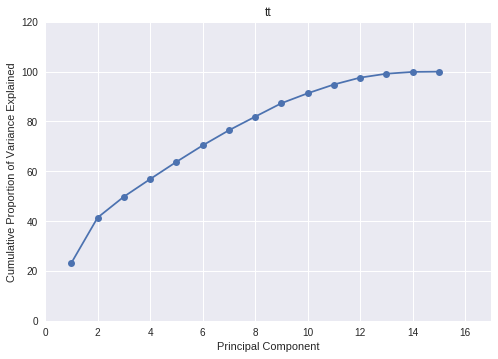

In [19]:
#plot 
import matplotlib.pyplot as plt
plt.plot(range(1,16),cumulative*100, marker='o')
plt.axis([0, 17, 0, 120])
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.title("tt")
plt.show()